# **0.0 - Indice e anotacoes**

*   Revisar comentarios de todo o documento
*   Parte de hipoteses (pesquisar e ver EDA)
*   Criar modelos e metodos de avaliacao 
*   Desenvolver aplicativo web (grafico e modelo)
*   Transformar essa secao em indice do documento

# **1.0 - Construcao do ambiente**

1.   Configuracoes iniciais para inicio do trabalho
2.   Carregar o ds em memoria e visualizar as estatisticas
3.   Personalizar as caracteristicas e cores das figuras

## 1.1 - Importando as bibliotecas

In [1]:
# Manipulacao do dataframe
import numpy as np
import pandas as pd

# Plotagem dos graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de ML
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# Tunning do algoritmo
from sklearn.model_selection import GridSearchCV

# Eliminando warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2 - Carregando o dataset

In [2]:
# Upload do conjunto de dados
endereco = '/content/drive/MyDrive/Notebooks/apartment_dataset_kaggle/'
data = pd.read_csv(endereco + 'precos_aptos_sao_paulo.csv')

# Primeira visualizacao do df
data.describe()

,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES
count,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000
mean,128.062345,2.860664,2.467045,0.763357,1.844870,995.773735
std,93.374991,0.783342,1.266961,1.069804,1.014796,858.878453
min,23.000000,1.000000,1.000000,0.000000,1.000000,100.000000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000
75%,160.000000,3.000000,3.000000,1.000000,2.000000,1272.000000
max,864.000000,8.000000,10.000000,8.000000,10.000000,11000.000000


## 1.3 - Personalizando as figuras

In [3]:
# Setando o estilo dos graficos
sns.set_style('darkgrid')

# Cor principal para os graficso
cor = '#0000FF'

# **2.0 - Tratamento dos dados**

1.   Manipulacao e criacao de novas features
2.   Abordagem de valores faltantes e outliers
3.   A formula classica de outliers nao foi eficiente
4.   Entao me baseei em pesquisa e analise do ds
5.   Eliminei os bairros com pooucas amostras

## 2.1 - Criacao de novas colunas

In [4]:
# comodos_totais - Soma de quartos, banheiros e suites
data['comodos_totais'] =  data['quartos'] \
                        + data['banheiros'] \
                        + data['suites']

# preco_m2_milhares - Preco de venda dividido pela metragem
data['preco_m2_milhares'] = round(data['PRECO_MILHARES']
                                / data['metragem'], 3)

## 2.2 - Definindo os outliers

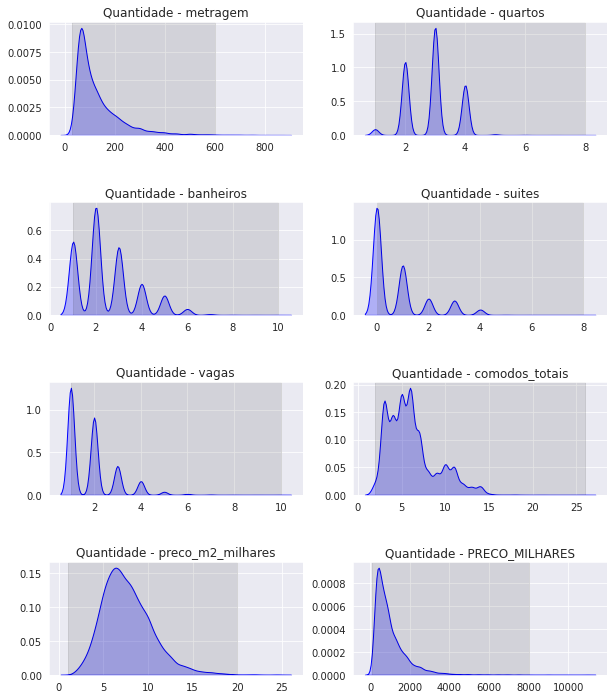

In [5]:
def plot_kde(df, col_x):
    # Grafico kde simples
    sns.kdeplot(col_x,
                data = df,
                shade = True,
                color = cor)
    
    plt.title('Quantidade - {}'.format(col_x))
    
    # Eixo x
    plt.xlabel('')

    #Eixo y
    plt.ylabel('')

def plor_axvspan_nout(min_lim, max_lim):
    plt.axvspan(min_lim, max_lim,
                alpha= 0.1,
                color= 'black')

fig, ax = plt.subplots(figsize = (10, 12))

plt.subplot(4, 2, 1)
plot_kde(data, 'metragem')
plor_axvspan_nout(30, 600)

plt.subplot(4, 2, 2)
plot_kde(data, 'quartos')
plor_axvspan_nout(1, 8) # Usei o range todo

plt.subplot(4, 2, 3)
plot_kde(data, 'banheiros')
plor_axvspan_nout(1, 10) # Usei o range todo

plt.subplot(4, 2, 4)
plot_kde(data, 'suites')
plor_axvspan_nout(0, 8) # Usei o range todo

plt.subplot(4, 2, 5)
plot_kde(data, 'vagas')
plor_axvspan_nout(1, 10) # Usei o range todo

plt.subplot(4, 2, 6)
plot_kde(data, 'comodos_totais')
plor_axvspan_nout(2, 26) # Usei o range todo

plt.subplot(4, 2, 7)
plot_kde(data, 'preco_m2_milhares')
plor_axvspan_nout(1, 20)

plt.subplot(4, 2, 8)
plot_kde(data, 'PRECO_MILHARES')
plor_axvspan_nout(100, 8000)

plt.subplots_adjust(hspace= 0.6)
plt.show()

## 2.3 - Eliminando os outliers

In [6]:
def elimina_outlier(df, col, min, max):
    # FUncao que recebe um df e retorn os filtros
    df = df[df[col] >= min]
    df = df[df[col] <= max]
    return df

# Aplicando a funcao na coluans escolhidas
data = elimina_outlier(data, 'metragem', 30, 600)
data = elimina_outlier(data, 'preco_m2_milhares', 1, 20)
data = elimina_outlier(data, 'PRECO_MILHARES', 100, 8000)

data.describe()

,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES,comodos_totais,preco_m2_milhares
count,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000
mean,126.124816,2.855982,2.453818,0.751648,1.833323,979.821849,6.061448,7.644003
std,87.675606,0.777926,1.249771,1.053504,0.996793,808.978830,2.734449,2.746105
min,30.000000,1.000000,1.000000,0.000000,1.000000,100.000000,2.000000,1.408000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000,4.000000,5.680000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000,6.000000,7.273000
75%,158.000000,3.000000,3.000000,1.000000,2.000000,1250.000000,7.000000,9.255500
max,600.000000,7.000000,9.000000,5.000000,10.000000,8000.000000,21.000000,20.000000


## 2.3 - Eliminando threshold

In [7]:
# Calculei quantas vezes cada bairro aparece
data['n_threshold'] = data.groupby(['bairros']) \
                      ['PRECO_MILHARES'].transform('count')

# Exclui os bairros que aparecem menos que 20x
data = data[data['n_threshold'] >= 20]
data.drop('n_threshold', axis= 1, inplace=True)

# **3.0 - Analise exploratoria**

1.   Novamente vejo estatisticas basicas do ds
2.   Seleciono alguns graficos para entender
3.   Levanto hipoteses dos dados e coloco a prova

## 3.1 - Estatisticas do dataset

In [8]:
# Vamos ver quantas amostra e estatiscas
data.describe()

,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES,comodos_totais,preco_m2_milhares
count,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000,12780.000000
mean,134.127387,2.915962,2.584898,0.825900,1.917136,1076.037123,6.326761,8.035554
std,89.246790,0.785349,1.239870,1.080876,1.017772,829.695741,2.740769,2.716477
min,30.000000,1.000000,1.000000,0.000000,1.000000,100.000000,2.000000,1.462000
25%,70.000000,2.000000,2.000000,0.000000,1.000000,520.000000,4.000000,6.115000
50%,105.000000,3.000000,2.000000,0.000000,2.000000,848.000000,6.000000,7.731000
75%,170.000000,3.000000,3.000000,1.000000,2.000000,1375.750000,7.000000,9.630000
max,600.000000,6.000000,8.000000,5.000000,10.000000,8000.000000,18.000000,19.568000


## 3.2 - Graficos dos dados

## 3.3 - Hipoteses levantadas

### Bairros mais caros e mais baratos por categoria

### Precos finais de venda por faixa de metragem

# **4.0 - Preco de venda**

1.   Plot dos graficos de comparacao - Features vs target
2.   Estudo com Random Forest sobre a relevancia das colunas
3.   Correlacao de todas as colunas por pearson
4.   Colunas mais relevantes: metragem, bairro e vagas

## 4.1 - Features vs Preco de venda

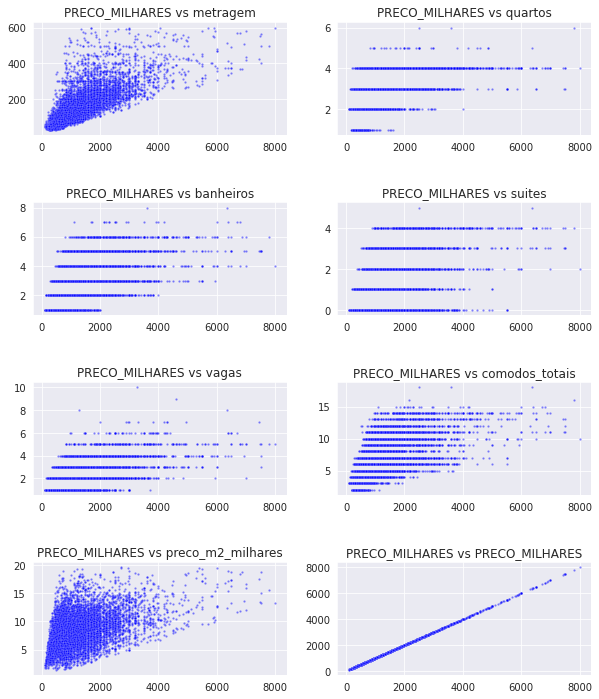

In [9]:
def plot_scatter(df, col_x, col_y):
    # Grafico scatter simples
    sns.scatterplot(col_x,
                    col_y,
                    data = df,
                    alpha = 0.5,
                    s = 5,
                    color = cor)
    
    plt.title('{} vs {}'.format(col_x, col_y))
    
    # Eixo x
    plt.xlabel('')

    #Eixo y
    plt.ylabel('')

fig, ax = plt.subplots(figsize = (10, 12))

plt.subplot(4, 2, 1)
plot_scatter(data, 'PRECO_MILHARES', 'metragem')

plt.subplot(4, 2, 2)
plot_scatter(data, 'PRECO_MILHARES', 'quartos')

plt.subplot(4, 2, 3)
plot_scatter(data, 'PRECO_MILHARES', 'banheiros')

plt.subplot(4, 2, 4)
plot_scatter(data, 'PRECO_MILHARES', 'suites')

plt.subplot(4, 2, 5)
plot_scatter(data, 'PRECO_MILHARES', 'vagas')

plt.subplot(4, 2, 6)
plot_scatter(data, 'PRECO_MILHARES', 'comodos_totais')

plt.subplot(4, 2, 7)
plot_scatter(data, 'PRECO_MILHARES', 'preco_m2_milhares')

plt.subplot(4, 2, 8)
plot_scatter(data, 'PRECO_MILHARES', 'PRECO_MILHARES')

plt.subplots_adjust(hspace= 0.6)
plt.show()

## 4.2 - Feature importance com RFR

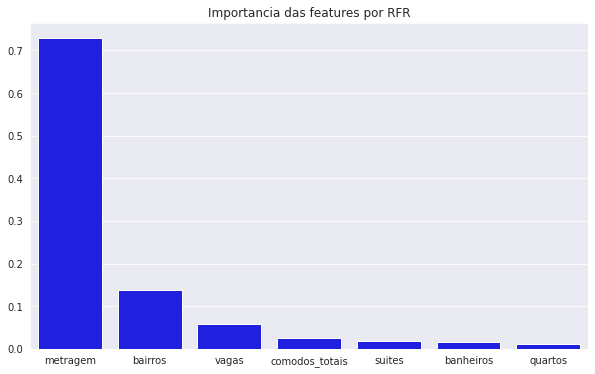

In [10]:
# Criei o data_feat, so usado aqui, para manter o original   
# Exclui preco/m2, pois deriva diretamente preco final




# Criando um datarframe novo igual ao principal
data_feat = data.copy().drop('preco_m2_milhares',
                             axis = 1)

# Preparando a coluna bairros para receber ML
le = preprocessing.LabelEncoder()
data_feat['bairros'] = le.fit_transform(data_feat['bairros'])

# Treinando o algoritmo RFR no dataframe novo
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(data_feat.drop(['PRECO_MILHARES'], axis= 1),
        data_feat['PRECO_MILHARES'])

# Descobrindo a importancia de cada feature
imp_feat = pd.DataFrame({'colunas':
                         data_feat.drop(['PRECO_MILHARES'],
                                              axis= 1).columns,
                         'importancia':
                         rfr.feature_importances_})
imp_feat = imp_feat.sort_values(by = 'importancia',
                                ascending = False)

def plot_bar(df, col_x, col_y, titulo):
    # Grafico barras simples
    sns.barplot(col_x,
                col_y,
                data = df,
                color = cor)
    
    plt.title(titulo)
    
    #Eixo x
    plt.xlabel('')
    
    # Eixo y
    plt.ylabel('')

# Plot do dataframe gerado
fig, ax = plt.subplots(figsize = (10, 6))

plot_bar(imp_feat, 'colunas', 'importancia',
         'Importancia das features por RFR')

plt.show()

## 4.3 - Correlacao das colunas

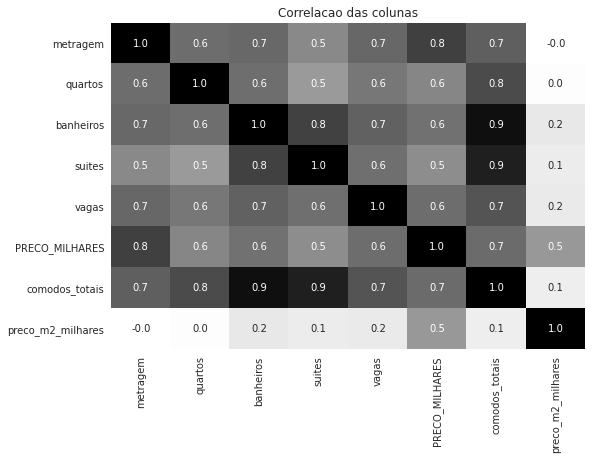

In [11]:
def plot_corr(df, titulo):
    # Grafico barras simples
    sns.heatmap(df.corr(), 
                annot= True,
                cmap = 'Greys',
                cbar = False,
                fmt = '.1f')
    
    plt.title(titulo)
    
    #Eixo x
    plt.xlabel('')
    
    # Eixo y
    plt.ylabel('')

# Plot do dataframe gerado
fig, ax = plt.subplots(figsize = (8.5, 6))

plot_corr(data, 'Correlacao das colunas')

plt.show()

# **5.0 - Machine learning e deploy**

1.   Nao deletei colunas, ja que isso se deu melhor nos testes
2.   Apliquei o label encoder do Skelearn na coluna bairros
3.   Nao escalei nenhuma coluna, pois assim performou melhor
4.   Rodei algoritmos variados, escolhi o de melhor desempenho
5.   Fiz a sintonia fina do melhor algoritmo usando grid cv
6.   Baixei os arquivos necesarios para colocar em producao

## 5.1 - Preparando o dataframe

In [12]:
# Aplicar o label encoder denovo

x = 'x'
y = 'y'

## 5.2 - Avaliando alguns modelos

In [13]:
# Escolher algoritmos ### e lsita-los
# criar funcao que retorna resultados em foram de grafico e etc

[Link do LinkedInNatalia Zaniboni](https://www.analyticsvidhya.com/blog/2020/11/a-tour-of-evaluation-metrics-for-machine-learning/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)

## 5.3 - Tuning do modelo final

In [14]:
# Definindo modelo final e definicao dos parametros

## 5.4 - Preparacao para producao

In [15]:
# Baixar o modelo final e os labels